<a href="https://colab.research.google.com/github/coolczatka/seismic_bump_danger_prediction/blob/master/MOW2_Opis_projektu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Opis danych i przekształcenia

## Opis realizowanego tematu
W ramach projektu będziemy realizować klasyfikację wykrywającą  stan zagrożenia w kopalni na podstawie warunków panujących w kopalni w trakcie poprzedniej zmiany.

## Opis zbioru danych

Zbiór danych znajduje się na stronie https://archive.ics.uci.edu/ml/datasets/seismic-bumps. Został przekazany przez pracowników Politechniki Śląskiej, a same dane pochodzą z dwóch szybów górnośląskiej kopalnii węgla. 

Zbiór zawiera 2584 wiersze. W każdym z nich znajdują się informacje o zmianie oraz warunkach, jakie panowały w szybie w trakcie jej trwania, oraz informacja, czy podczas następnej zmiany nastąpiło tąpnięcie.




## Statystyki zbioru i wizualizacje


Każdy wiersz zbioru danych zawiera 19 cech: 

* class - (binarne) informacja następnej zmiany wystąpiło silne tąpnięcie sejsmiczne (> 10^4 J) (1 - tak, 0 - nie). 

  Dysproporcja w reprezentacji klas: 
  1: 170  (6.6%)
  0: 2414 (93.4%)

* seismic - poziom zagrożenia podczas zmiany wyznaczony metodą sejsmiczną ()
* seismoacustic - poziom zagrozenia podczas zmiany wyznaczony metodą sejsmoakustyczną 
* ghazard - poziom zagrożenia podczas zmiany wyznaczony metodą sejsmiczną tylko za pomocą najbardziej aktywnego geofonu. 

  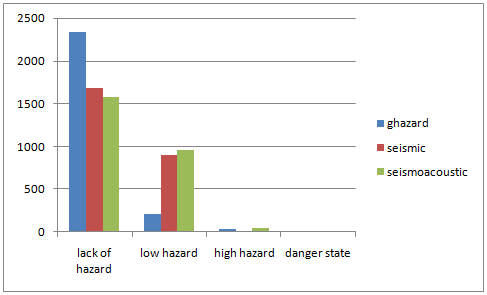 

* shift - informacja, czy zmiana była wydobywcza czy przygotowawcza (W - wydobywcza, N - przygotowawcza)

* genergy - energia sejsmiczna zarejestrowana przez najbardziej aktywny geofon w szybie (GMax) (dane liczbowe ciągłe). 

  Średnia    90242.5            

  Mediana     25485

  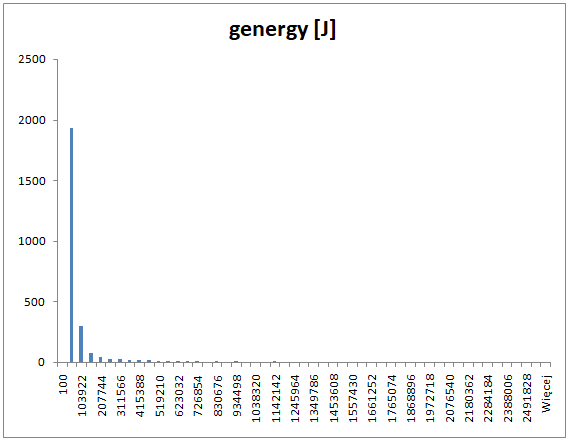
* gpuls - liczba pulsów zarejestrowana przez GMax (dane liczbowe dyskretne).

  Średnia    539

  Mediana    379

  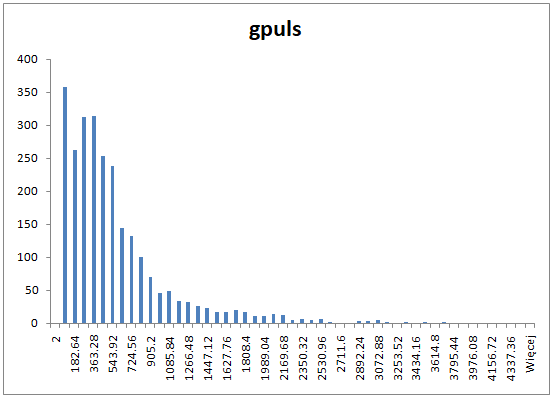

* gdenergy - odchylenie energii z GMax od średniej z odczytów z 8 poprzednich zmian. 

  Średnia    12.3758            

  Mediana     -6

  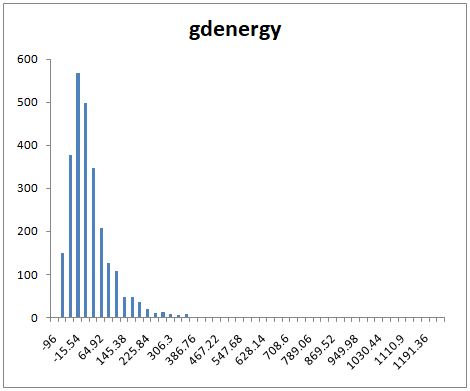

* gdpuls - odchylenie liczby pulsów od liczby odczytów z 8 poprzednich zmian. 

  Średnia    90242.5            

  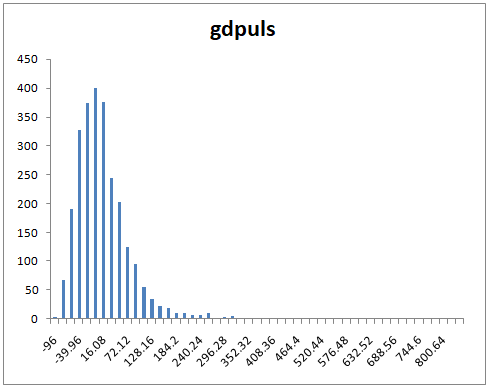

* nbumps - wszystkie tąpnięcia 
* nbumps2 - tąpnięcia o energii [10^2,10^3))
* nbumps3 - tąpnięcia o energii [10^3,10^4))
* nbumps4 - tąpnięcia o energii [10^4,10^5))
* nbumps5 - tąpnięcia o energii [10^5,10^6))
* nbumps6 - tąpnięcia o energii [10^6,10^7))
* nbumps7 - tąpnięcia o energii [10^7,10^8))
* nbumps89 - tąpnięcia o energii [10^8,10^10))
*  energy - całkowita energia wszystkich tąpnięć 

  Średnia     4975.270898

  Mediana    0
* maxenergy - energia najsilniejszego tąpnięcia 

 Średnia    4278.850619
  
  Mediana    0



**Podsumowanie**

Zbiór cechuje się bardzo dużą dysproporcją klas. 93.4% wierszy odzwierciedla stan braku tąpnięć wysokiej energii podczas następnej zmiany. Z tego powodu wykresy energii sejsmicznej oraz pulsów są bardzo prawoskośne. 

## Uzupełnianie danych
### Wyrzucenie danych ze zbioru i uzupełnienie ich
Zbiór był kompletny zatem wyrzucono z niego 10% losowych danych.

W wartościach numerycznych uzupełniono brakujące wartości medianą, a w reszcie przypadków najczęściej powtarzającą się wartością

In [ ]:
import pandas as pd
import numpy as np
import random
 
df = pd.read_csv('seismic.csv', sep=',')
y = df['class']
df = df.drop('class', axis=1)
columns = df.columns
 
# for columnName in columns:
#   for index in range(len(df[columnName].values)):
#     if random.random()<=.1:
#       df.at[index, columnName] = None
#   # uzupelnienie
#   if(df[columnName].dtype == 'float64'):
#     df[columnName].fillna(df[columnName].median(skipna=True), inplace=True)
#   else:
#     df[columnName].fillna(df[columnName].mode()[0], inplace=True)

## Skalowanie cech

### Kodowanie wartości tekstowych
Dla kolumn seismic, seismoacoustic, ghazard zastosowano "label encoding" natomiast dla kolumny shift "one hot encoding"

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
 
labelEncodedColumns = ['seismic', 'seismoacoustic', 'ghazard']
oneHotEncodedColumns = ['shift']
 
le = LabelEncoder()
ohe = OneHotEncoder()
 
for columnName in labelEncodedColumns:
  df[columnName] = le.fit_transform(df[columnName])
for columnName in oneHotEncodedColumns:
  enc_df = pd.DataFrame(ohe.fit_transform(df[[columnName]]).toarray())
  df = df.join(enc_df)
 
df.rename(columns={0:"shift_N", 1:"shift_W"}, inplace=True)
df = df.drop('shift', axis=1)
df.to_csv('seismic2.csv')
df

,seismic,seismoacoustic,genergy,gpuls,gdenergy,gdpuls,ghazard,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,nbumps6,nbumps7,nbumps89,energy,maxenergy,shift_N,shift_W
0,0,0,15180,48,-72,-72,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0
1,0,0,14720,33,-70,-79,0,1,0,1,0,0,0,0,0,2000,2000,1.0,0.0
2,0,0,8050,30,-81,-78,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0
3,0,0,28820,171,-23,40,0,1,0,1,0,0,0,0,0,3000,3000,1.0,0.0
4,0,0,12640,57,-63,-52,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2579,1,0,81410,785,432,151,1,0,0,0,0,0,0,0,0,0,0,0.0,1.0
2580,1,0,42110,555,213,118,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0
2581,1,0,26960,540,101,112,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0
2582,0,0,16130,322,2,2,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0


### Standaryzacja
Do standaryzacji użyto klasy `StandardScaler`

In [ ]:
from sklearn.preprocessing import StandardScaler
columns = df.columns
scaled = pd.DataFrame(StandardScaler().fit_transform(df), columns=columns)
columns

Index(['seismic', 'seismoacoustic', 'genergy', 'gpuls', 'gdenergy', 'gdpuls',
       'ghazard', 'nbumps', 'nbumps2', 'nbumps3', 'nbumps4', 'nbumps5',
       'nbumps6', 'nbumps7', 'nbumps89', 'energy', 'maxenergy', 'shift_N',
       'shift_W'],
      dtype='object')

## Selekcja i ekstarkcja cech


Do ekstrakcji najbardziej znaczących cech wykorzystaliśmy metodę PCA zaimplementowaną wpakiecie Scikit Learn. Ustaliliśmy, że wariancja cech powinna wynosić 95%.

In [ ]:
from sklearn.decomposition import PCA
X = scaled
Y = y
pca = PCA(n_components=0.95)
pca.fit(X)
X_PCA = pca.transform(X)
X_PCA = pd.DataFrame(X_PCA)
X_PCA

,0,1,2,3,4,5,6,7,8,9
0,-2.456294,1.214957,-1.095231,0.107355,0.502299,0.040029,-0.394683,0.025486,0.219267,0.406931
1,-1.808017,1.176042,-1.715285,0.839351,0.456663,0.148705,-0.342870,-0.417681,-0.595520,0.565848
2,-2.508520,1.237240,-1.199832,0.078722,0.443488,0.062495,-0.454988,0.012676,0.230343,0.422839
3,-1.243596,1.046359,-0.476788,1.239041,0.928498,-0.191451,0.437353,-0.231223,-0.778497,0.334809
4,-2.377376,1.194089,-0.883020,0.186450,0.559491,-0.026510,-0.249131,0.061815,0.183423,0.366347
...,...,...,...,...,...,...,...,...,...,...
2579,1.449408,-1.263274,5.126751,0.364428,-0.038378,-1.509556,2.090218,-0.062514,-0.160854,1.777479
2580,0.601311,-0.728864,2.311399,-0.774553,0.015828,-1.558213,2.078309,-0.296843,-0.213338,-0.184732
2581,0.339995,-0.640709,1.579088,-1.045767,-0.203296,-1.341833,1.556333,-0.435360,-0.108207,-0.092843
2582,-0.683112,-0.264838,-0.134477,-1.152607,-0.334629,0.277769,0.885490,0.785474,-0.311295,0.302676


Po wykonaniu PCA w zbiorze danych pozostało 12 cech. 

## Podział zbioru na zbiory testowy i treningowy


In [ ]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)
X_PCA_train, X_PCA_test, y_pca_train, y_pca_test = train_test_split(X_PCA,Y,test_size=0.2)

## Balansowanie zbioru
Zbiór treningowy ma ok 7% przedstawicieli klasy 1 więc podjęto próbę wygenerowania danych z tej klasy.

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X_gen_train, Y_gen_train = oversample.fit_resample(X_train, y_train)
X_gen, Y_gen = oversample.fit_resample(X, Y)
X_gen_PCA_train, Y_gen_PCA_train = oversample.fit_resample(X_PCA_train, y_pca_train)
X_gen_PCA, Y_gen_PCA = oversample.fit_resample(X_PCA, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

# Klasyfikatory


## SVC

### Testowy i treningowy

acc: 0.793037 f1: 0.230216
acc: 0.384913 f1: 0.121547
acc: 0.802708 f1: 0.250000
acc: 0.702128 f1: 0.060976


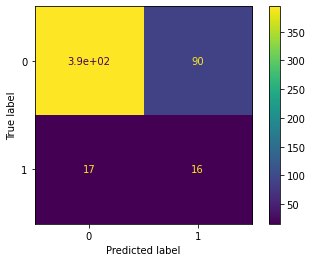

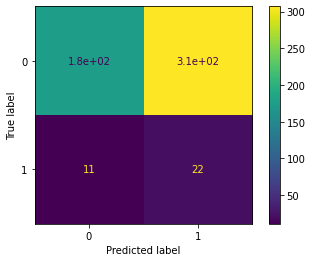

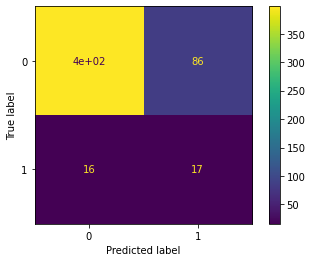

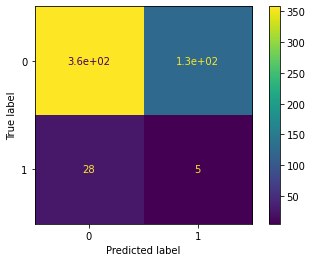

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score, KFold

clfDict= dict()
clfDictCV = dict()

def printMetrics(clf, X_test, y_test):
    predicted = clf.predict(X_test)
    print('acc: %f f1: %f' %(accuracy_score(y_test, predicted),f1_score(y_test, predicted)))
 
def printCrossValidationMean(clf, X, Y):
    scores = cross_val_score(clf, X, Y, cv=10, scoring='f1')
    print(np.mean(scores))
    return scores

clf = SVC(class_weight='balanced')
clf.fit(X_train, y_train)
plot_confusion_matrix(clf, X_test, y_test)
printMetrics(clf, X_test, y_test)

predicted = clf.predict(X_test)
clfDict['SVC'] = {'clf': clf, 'f1': f1_score(y_test, predicted)}
 
#normalne dane zbalansowane wagi pca
clfPCA = SVC(class_weight='balanced')
clfPCA.fit(X_PCA_train, y_train)
plot_confusion_matrix(clfPCA, X_PCA_test, y_test)
printMetrics(clfPCA, X_PCA_test, y_test)
 
#dane wygenerowane
clfGen = SVC()
clfGen.fit(X_gen_train, Y_gen_train)
plot_confusion_matrix(clfGen, X_test, y_test)
printMetrics(clfGen, X_test, y_test)
 
#dane wygenerowane pca
clfGenPCA = SVC()
clfGenPCA.fit(X_gen_PCA_train, Y_gen_PCA_train)
plot_confusion_matrix(clfGenPCA, X_PCA_test, y_test)
printMetrics(clfGenPCA, X_PCA_test, y_test)

### Kroswalidacja

In [ ]:
clf = SVC(class_weight='balanced')
f1 = printCrossValidationMean(clf, X, Y)
clfDictCV['SVC'] = {'clf': clf, 'f1': np.mean(f1)}
#dane wygenerowane
clf = SVC()
printCrossValidationMean(clf, X_gen, Y_gen)
 

0.19142594038457503
0.7601439488528831


array([0.68762279, 0.6437613 , 0.63197026, 0.82242991, 0.81045752,
       0.76413255, 0.8137045 , 0.78936605, 0.80912863, 0.82886598])

## KNN

### Testowy i treningowy

acc: 0.932302 f1: 0.285714
acc: 0.835590 f1: 0.285714


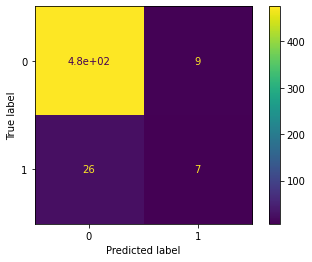

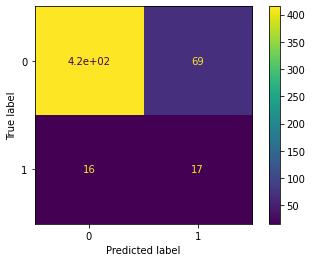

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
 
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
printMetrics(KNN, X_test, y_test)
plot_confusion_matrix(KNN, X_test, y_test)

predicted = KNN.predict(X_test)
clfDict['KNN'] = {'clf': KNN, 'f1': f1_score(y_test, predicted)}
 
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_gen_train, Y_gen_train)
printMetrics(KNN, X_test, y_test)
plot_confusion_matrix(KNN, X_test, y_test)

### Kroswalidacja

In [ ]:
#dane wygenerowane
clf = KNeighborsClassifier()
f1 = printCrossValidationMean(clf, X, Y)
clfDictCV['KNN'] = {'clf': clf, 'f1': np.mean(f1)}
#dane wygenerowane
clf = KNeighborsClassifier()
printCrossValidationMean(clf, X_gen, Y_gen)

0.07022610875013621
0.8647663402311097


array([0.80412371, 0.76      , 0.79238754, 0.94455852, 0.90373281,
       0.86924494, 0.91221374, 0.87878788, 0.87850467, 0.90410959])

## Drzewo decyzyjne

### Treningowy i testowy

acc: 0.839458 f1: 0.238532


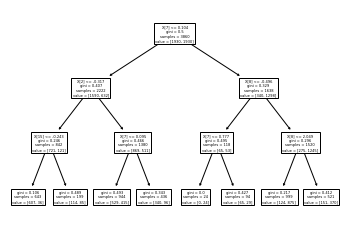

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_gen_train, Y_gen_train)
printMetrics(tree, X_test, y_test)
plot_tree(tree)

predicted = tree.predict(X_test)
clfDict['tree'] = {'clf': tree, 'f1': f1_score(y_test, predicted)}


### Kroswalidacja

In [ ]:
tree = DecisionTreeClassifier(max_depth=3)
f1 = printCrossValidationMean(tree, X, Y)
clfDictCV['tree'] = {'clf': tree, 'f1': np.mean(f1)}
tree = DecisionTreeClassifier(max_depth=3)
printCrossValidationMean(tree, X_gen, Y_gen)

0.029128205128205124
0.7169065886042952


array([0.64655172, 0.5913371 , 0.59760956, 0.78384798, 0.76767677,
       0.78365385, 0.75      , 0.74141049, 0.73      , 0.77697842])

## Las losowy

### Testowy i treningowy

acc: 0.936170 f1: 0.153846
acc: 0.887814 f1: 0.256410


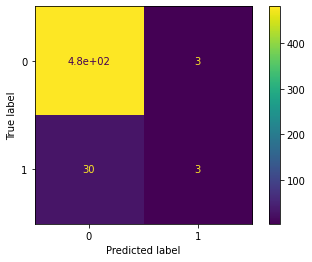

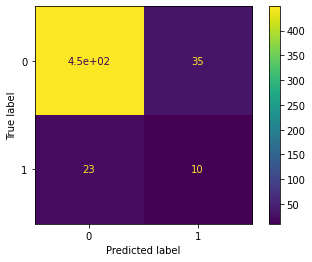

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomForrest = RandomForestClassifier(n_estimators=15, class_weight='balanced')
randomForrest.fit(X_train, y_train)
printMetrics(randomForrest, X_test, y_test)
plot_confusion_matrix(randomForrest, X_test, y_test)

predicted = randomForrest.predict(X_test)
clfDict['randomForrest'] = {'clf': randomForrest, 'f1': f1_score(y_test, predicted)}
 
randomForrest = RandomForestClassifier(n_estimators=11)
randomForrest.fit(X_gen_train, Y_gen_train)
printMetrics(randomForrest, X_test, y_test)
plot_confusion_matrix(randomForrest, X_test, y_test)

### Kroswalidacja


In [ ]:
randomForrest = RandomForestClassifier(n_estimators=6, class_weight='balanced')
f1 = printCrossValidationMean(randomForrest, X, Y)
clfDictCV['forest'] = {'clf': randomForrest, 'f1': np.mean(f1)}
randomForrest = RandomForestClassifier(n_estimators=6)
printCrossValidationMean(randomForrest, X_gen, Y_gen)

0.03194762684124386
0.9030920572215839


array([0.81057269, 0.80434783, 0.86538462, 0.94979079, 0.93167702,
       0.92723493, 0.9406953 , 0.92929293, 0.92433538, 0.9475891 ])

## Naiwny klasyfikator bayesowski

### Testowy i treningowy

acc: 0.843327 f1: 0.228571
acc: 0.709865 f1: 0.234694


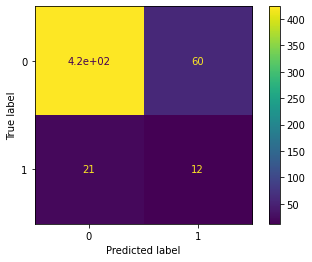

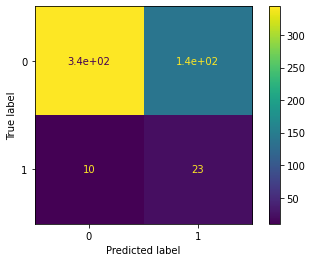

In [ ]:
from sklearn.naive_bayes import GaussianNB
 
naiveBayes = GaussianNB()
naiveBayes.fit(X_train, y_train)
printMetrics(naiveBayes, X_test, y_test)
plot_confusion_matrix(naiveBayes, X_test, y_test)
 
predicted = naiveBayes.predict(X_test)
clfDict['naiveBayes'] = {'clf': naiveBayes, 'f1': f1_score(y_test, predicted)}

naiveBayes = GaussianNB()
naiveBayes.fit(X_gen_train, Y_gen_train)
printMetrics(naiveBayes, X_test, y_test)
plot_confusion_matrix(naiveBayes, X_test, y_test)

### Kroswalidacja

In [ ]:
naiveBayes = GaussianNB()
f1 = printCrossValidationMean(naiveBayes, X, Y)
clfDictCV['naiveBayes'] = {'clf': naiveBayes, 'f1': np.mean(f1)}
naiveBayes = GaussianNB()
printCrossValidationMean(naiveBayes, X_gen, Y_gen)

0.27734314546594857
0.6901974851767354


array([0.61420345, 0.54678899, 0.58241758, 0.80812641, 0.77272727,
       0.75098814, 0.70726916, 0.68139963, 0.71146245, 0.72659176])

## Regresja logistyczna

### Testowy i treningowy

acc: 0.781431 f1: 0.251656
acc: 0.787234 f1: 0.246575


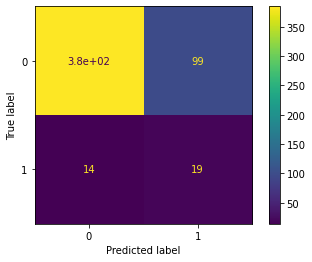

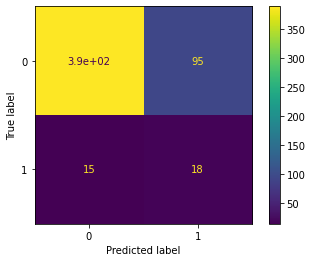

In [ ]:
from sklearn.linear_model import LogisticRegression
 
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)
printMetrics(lr, X_test, y_test)
plot_confusion_matrix(lr, X_test, y_test)

predicted = lr.predict(X_test)
clfDict['LR'] = {'clf': lr, 'f1': f1_score(y_test, predicted)}

lr = LogisticRegression()
lr.fit(X_gen_train, Y_gen_train)
printMetrics(lr, X_test, y_test)
plot_confusion_matrix(lr, X_test, y_test)

### Kroswalidacja

In [ ]:
lr = LogisticRegression()
f1 = printCrossValidationMean(lr, X, Y)
clfDictCV['LR'] = {'clf': lr, 'f1': np.mean(f1)}

lr = LogisticRegression()
printCrossValidationMean(lr, X_gen, Y_gen)

0.041025641025641026
0.6990179335756483


array([0.61923077, 0.56102004, 0.57307692, 0.78743961, 0.78403756,
       0.71762208, 0.70954357, 0.74157303, 0.70940171, 0.78723404])

# Klasyfikator zespolony

Zastosowano 3 najlepsze klasyfikatory według uczenia z podziałem na zbiór testowy i treningowy. Wynik uległ poprawie

In [ ]:
from sklearn.ensemble import VotingClassifier
bestClassifiersList = [v['clf'] for k, v in sorted(clfDict.items(), key=lambda item: item[1]['f1'], reverse=True)]
for i, j in clfDict.items():
  print(i, " ", j['f1'])
best3 = bestClassifiersList[:3]
print(best3)
vc = VotingClassifier([(str(x), x) for x in best3])
vc.fit(X_train, y_train)
printMetrics(vc, X_test, y_test)
printCrossValidationMean(vc, X, Y)

SVC   0.2302158273381295
KNN   0.2857142857142857
tree   0.23853211009174313
randomForrest   0.15384615384615385
naiveBayes   0.2285714285714286
LR   0.2516556291390728
[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform'), LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                   